## 

## Pymaceuticals, Inc. Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# Load data
mouse_metadata = pd.read_csv('./Data/mouse_metadata.csv')
study_results = pd.read_csv('./Data/study_results.csv')

In [ ]:
# Merge dataframes
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Number of unique mice IDs
unique_mice = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice}")
# Check for duplicates
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(f"Duplicate data for mouse IDs:\n{duplicate_mouse_ids}")

Number of unique mice IDs: 249
Duplicate data for mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [ ]:
# Remove duplicates
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [ ]:
# Updated number of unique mice IDs
updated_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs after cleaning: {updated_unique_mice}")


Number of unique mice IDs after cleaning: 249


In [ ]:
# Summary statistics by drug regimen
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    median_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    variance_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    std_dev_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    sem_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
)

print(summary_stats)

              mean_tumor_volume  median_tumor_volume  variance_tumor_volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              std_dev_tumor_volume  sem_tumor_volum

In [ ]:
import matplotlib.pyplot as plt

# Count of timepoints for each drug regimen
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()


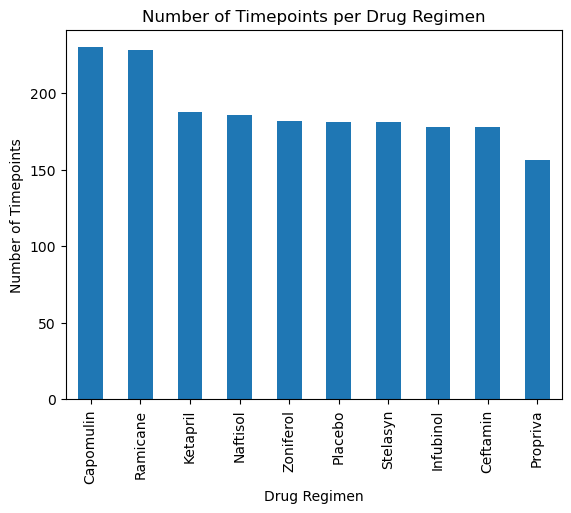

In [ ]:
# Bar chart using Pandas
timepoint_counts.plot(kind='bar')
plt.title('Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

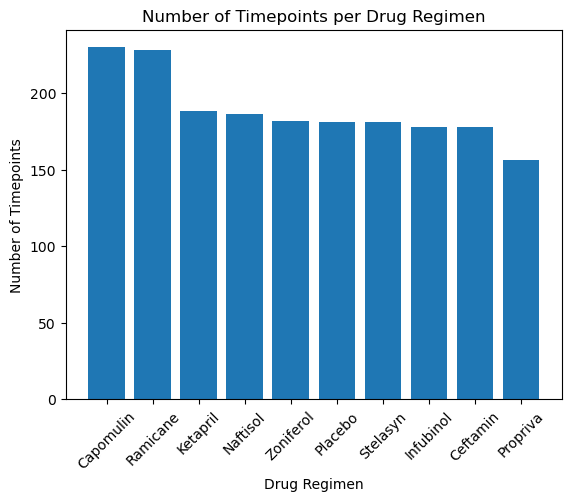

In [ ]:
# Bar chart using Matplotlib
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title('Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Distribution of unique female versus male mice
gender_distribution = cleaned_data['Sex'].value_counts()


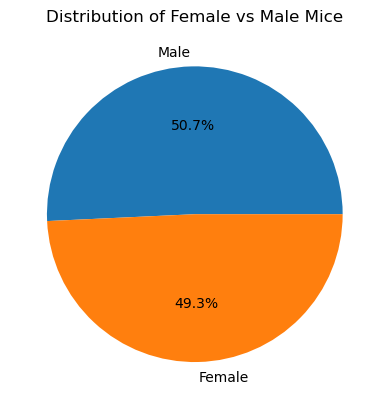

In [ ]:
# Pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')
plt.show()

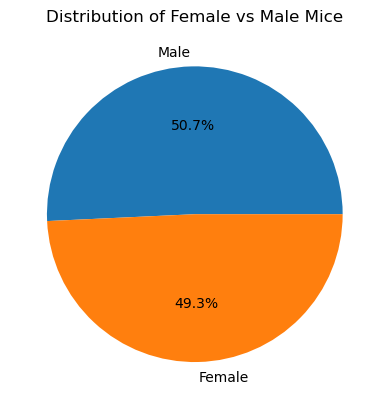

In [ ]:
# Pie chart using Matplotlib
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

In [ ]:
# Final tumor volume for each mouse
final_tumor_volumes = cleaned_data.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': 'last'}).reset_index()


In [ ]:
# Treatment regimens to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Prepare lists for plotting
tumor_volumes = []

for treatment in treatments:
    
    treatment_data = final_tumor_volumes[cleaned_data['Drug Regimen'] == treatment]
    
    tumor_volumes.append(treatment_data['Tumor Volume (mm3)'])

# Calculate quartiles and IQR 
quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
IQR = quartiles[0.75] - quartiles[0.25]
lower_bound = quartiles[0.25] - (1.5 * IQR)
upper_bound = quartiles[0.75] + (1.5 * IQR)
outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
print(f"{treatment} Outliers:\n{outliers}")

Ceftamin Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


C:\Users\000154302\AppData\Local\Temp\ipykernel_2848\2347635964.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_data = final_tumor_volumes[cleaned_data['Drug Regimen'] == treatment]
C:\Users\000154302\AppData\Local\Temp\ipykernel_2848\2347635964.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_data = final_tumor_volumes[cleaned_data['Drug Regimen'] == treatment]
C:\Users\000154302\AppData\Local\Temp\ipykernel_2848\2347635964.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_data = final_tumor_volumes[cleaned_data['Drug Regimen'] == treatment]
C:\Users\000154302\AppData\Local\Temp\ipykernel_2848\2347635964.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_data = final_tumor_volumes[cleaned_data['Drug Regimen'] == treatment]


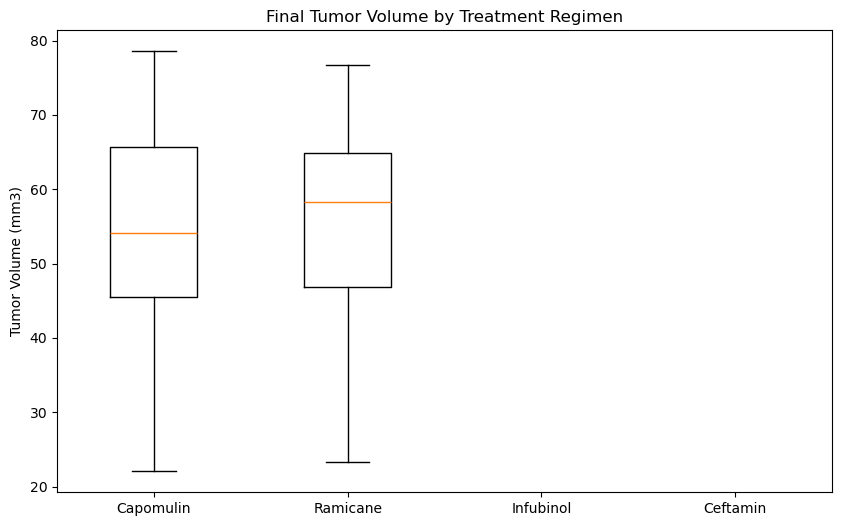

In [ ]:
# Box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Final Tumor Volume by Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Select a mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[0]  # Select the first mouse ID

In [ ]:
# Data for that mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

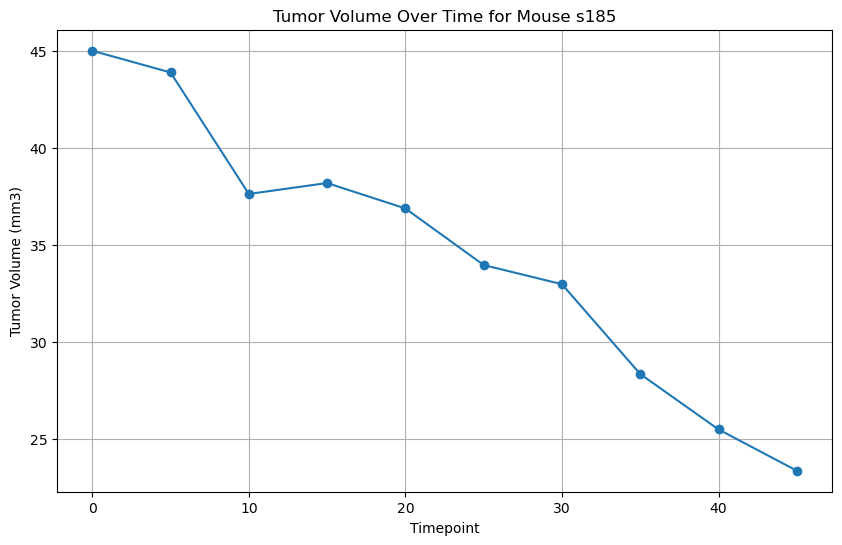

In [ ]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [ ]:
# Average tumor volume vs mouse weight for Capomulin regimen
capomulin_group = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg(
    avg_tumor_volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    weight=pd.NamedAgg(column='Weight (g)', aggfunc='mean')
).reset_index()

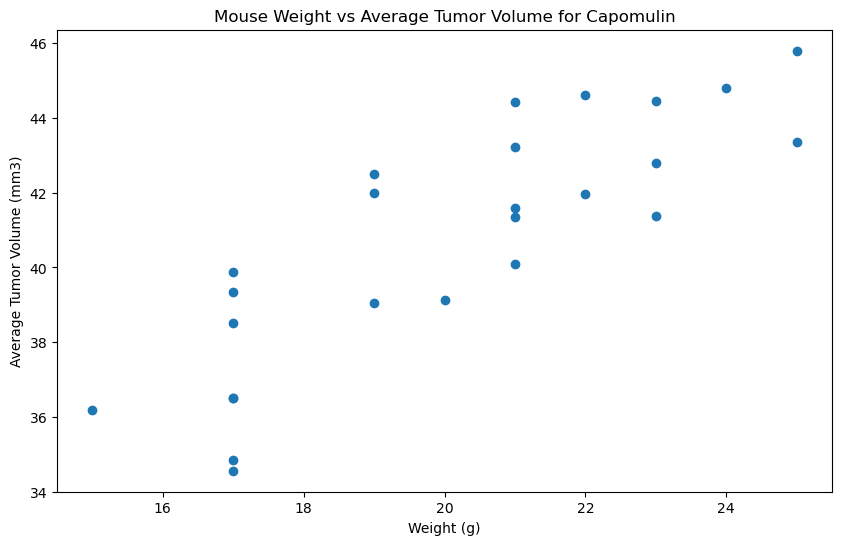

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_group['weight'], capomulin_group['avg_tumor_volume'])
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
from scipy.stats import linregress

# Calculate correlation coefficient
correlation = capomulin_group['weight'].corr(capomulin_group['avg_tumor_volume'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.8419363424694722


In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_group['weight'], capomulin_group['avg_tumor_volume'])


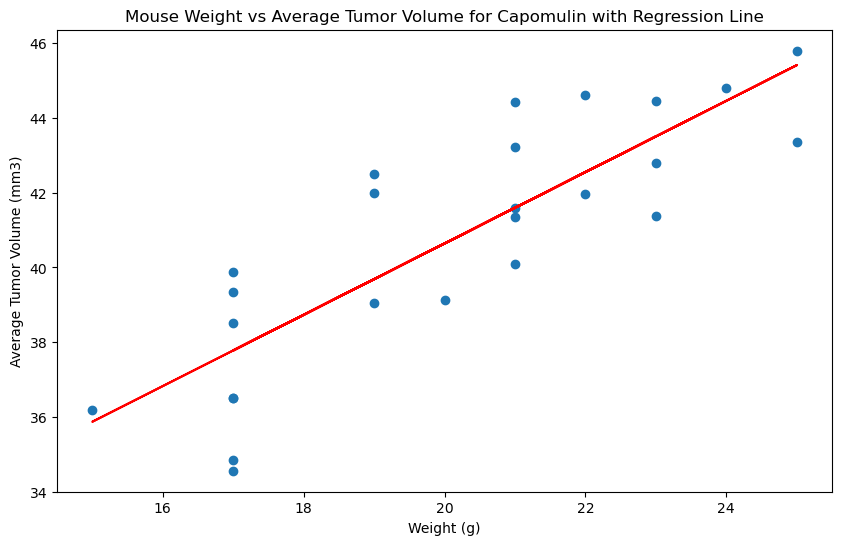

In [ ]:
# Regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_group['weight'], capomulin_group['avg_tumor_volume'])
plt.plot(capomulin_group['weight'], intercept + slope * capomulin_group['weight'], color='red')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

